# <center> GovHack 2018 <center>

## <center> Altis Consulting Canberra Team <center>

# <center> Project: Insolvency, Facts vs Spin <center>

##  <center> Jupyter Notebook 2/2 - Neural Network Classification (R,H2O) <center>

## 1. Import Libraries & Files

In [1]:
# library imports
library(mvtnorm) # generates multivariate Gaussian sampels and calculate the densities
library(ggplot2) # plotting
library(reshape2) # data wrangling!
library(tm) # load Text Mining library
library(reshape2) # for melt and cast functions
set.seed(12345) # save the random seed to make the results reproducble

Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'reshape2' was built under R version 3.4.4"Warning message:
"package 'tm' was built under R version 3.4.4"Loading required package: NLP

Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate



In [2]:
df_insolvency <- read.csv("one_hot_small_insolvency.csv")

## 2. Data Wrangling

In [4]:
# remove id column
df_insolvency <- df_insolvency[,-1]

In [8]:
head(df_insolvency,3)

Calendar.Year.of.Insolvency,SA3.of.Debtor_Adelaide.City,SA3.of.Debtor_Adelaide.Hills,SA3.of.Debtor_Albany,SA3.of.Debtor_Albury,SA3.of.Debtor_Alice.Springs,SA3.of.Debtor_Armadale,SA3.of.Debtor_Armidale,SA3.of.Debtor_Auburn,SA3.of.Debtor_Augusta...Margaret.River...Busselton,...,Value.of.Assets_.600000..649999,Value.of.Assets_.650000..699999,Value.of.Assets_.700000..749999,Value.of.Assets_.750000..799999,Value.of.Assets_.800000..849999,Value.of.Assets_.850000..899999,Value.of.Assets_.900000..949999,Value.of.Assets_.950000..999999,Value.of.Assets_More.Than..1000000,y
2010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
library(caTools)

Warning message:
"package 'caTools' was built under R version 3.4.4"

### Split 1 - Training vs Test Sets

In [10]:
split = sample.split(df_insolvency$y, SplitRatio = 0.8)

In [11]:
training_set = subset(df_insolvency, split == TRUE)
test_set = subset(df_insolvency, split == FALSE)

In [12]:
training_set <- training_set[sample(nrow(training_set)),]

In [13]:
dim(training_set)

[1] 285200    520

In [14]:
table(training_set$y)


     0      1 
273286  11914 

### Split 2 - Resample vs Nochange For Training Set

In [15]:
split2.ratio <- 0.3

In [16]:
split2 = sample.split(training_set$y, SplitRatio = split2.ratio)

In [17]:
training_set_change = subset(training_set, split2 == TRUE)
training_set_nochange = subset(training_set, split2 == FALSE)

### Split 3 - Upsample vs Downsample For Resample Set

In [19]:
split3.ratio.up <- 0.5

In [20]:
split3 = sample.split(training_set_change$y, SplitRatio = split3.ratio.up)

In [21]:
training_set_upsample = subset(training_set_change, split3 == TRUE)
training_set_downsample = subset(training_set_change, split3 == FALSE)

In [22]:
dim(training_set_upsample)
dim(training_set_downsample)

[1] 42780   520

[1] 42780   520

In [24]:
library(caret)

Warning message:
"package 'caret' was built under R version 3.4.4"Loading required package: lattice


In [25]:
training_set_upsample$y <- as.factor(training_set_upsample$y)
training_set_downsample$y <- as.factor(training_set_downsample$y)

In [26]:
training_set_downsample <- downSample(x = training_set_downsample,
                         y = training_set_downsample$y)

In [27]:
dim(training_set_downsample)

[1] 3574  520

In [28]:
table(training_set_downsample$Class)


   0    1 
1787 1787 

In [29]:
training_set_upsample <- upSample(x = training_set_upsample,
                         y = training_set_upsample$y)

In [30]:
dim(training_set_upsample)

[1] 81986   520

In [31]:
table(training_set_upsample$Class)


    0     1 
40993 40993 

### Recombine Upsample and Downsample Into Resample Training Set

In [32]:
training_set_change <- rbind(training_set_upsample,training_set_downsample)

In [33]:
table(training_set_change$Class)


    0     1 
42780 42780 

In [34]:
training_set_change <- training_set_change[sample(nrow(training_set_change)),]

In [35]:
names(training_set_change)[ncol(training_set_change)] <- 'y'

In [36]:
table(training_set_change$y)


    0     1 
42780 42780 

### Recombine Resample and No Change Into Training Set

In [37]:
training_set <- rbind(training_set_change,training_set_nochange)

In [38]:
training_set <- training_set[sample(nrow(training_set)),]

In [39]:
#head(training_set,3)

In [40]:
table(training_set$y)


     0      1 
234080  51120 

## 3. H2O For Neural Networks

In [41]:
options(warn=-1)
library(h2o)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: 'h2o'

The following objects are masked from 'package:stats':

    cor, sd, var

The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc



In [42]:
# If there is a proxy: proxy.old <- Sys.getenv('http_proxy'); Sys.setenv('http_proxy'='');
# You may need to change the h2o.inint paramter values
#localH2O =  h2o.init(nthreads = -1, port = 54321, max_mem_size = '6G', startH2O = TRUE)
h2o.init(nthreads = -1)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         5 minutes 38 seconds 
    H2O cluster timezone:       Australia/Sydney 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.20.0.3 
    H2O cluster version age:    1 month and 29 days  
    H2O cluster name:           H2O_started_from_R_deepthoughtthinking_dzu677 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   0.64 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Algos, AutoML, Core V3, Core V4 
    R Version:                  R version 3.4.3 (2017-11-30) 



In [43]:
train.data.h2o <- as.h2o(training_set)

  |======================================================================| 100%


In [44]:
dim(train.data.h2o)

[1] 285200    520

In [45]:
test.data.h2o <-as.h2o(test_set)

  |======================================================================| 100%


In [46]:
dim(test.data.h2o)

[1] 71300   520

In [47]:
# Convert target variables to factors
train.data.h2o[,'y'] <- as.factor(train.data.h2o[,'y'])
test.data.h2o[,'y'] <- as.factor(test.data.h2o[,'y'])

### Train Neural Network

Layer 1: 60 neurons

Layer 2: 20 neurons

Layer 3: 10 neurons

In [157]:
# Train Neural Network
K <- c(60)
NN.epochs <-100

nn.model.evaluation <- data.frame(
    k=K, train.accuracy=rep(0, length(K)), test.accuracy=rep(0, length(K)))

best.prediction <- NULL
best.accuracy <- 0
best.k <- NULL
for (k in K) {
    
    print(paste('k=',k))
    flush.console()
    
    mdl <- h2o.deeplearning(    
    y = 'y',
    training_frame = train.data.h2o,   
    hidden = c(k,20,10), # number of layers and their units
    epochs = NN.epochs, # maximum number of epoches  
    activation = 'Tanh', # activation function 
    autoencoder = FALSE  
                              )
    
    test.pred <- h2o.predict(mdl, test.data.h2o)$predict
    train.pred <- h2o.predict(mdl, train.data.h2o)$predict
    test.results <- cbind(as.data.frame(test.data.h2o), predict=as.matrix(test.pred))
    train.results <- cbind(as.data.frame(train.data.h2o), predict=as.matrix(train.pred))
    accuracy.test <- sum(test.results$y == test.results$predict) / nrow(test.results)
    accuracy.train <- sum(train.results$y == train.results$predict) / nrow(train.results)
    
    nn.model.evaluation[nn.model.evaluation$k==k,] <- c(k, accuracy.train, accuracy.test)
    
    # Find and record best k and test results
    if (accuracy.test > best.accuracy) {
        best.accuracy <- accuracy.test
        best.prediction <- test.results
        best.k <- k
    }
}

[1] "k= 60"
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


In [159]:
nn.model.evaluation

k,train.accuracy,test.accuracy
60,0.9411185,0.9326648


## 4. Results

We have two main ways to assess the model

1. Visualisation of decision boundary for final layer of the model 
2. Confusion matrix to calculate accuracy, precision and recall

### 4.1 Visualisation of Decision Boundary

$1.$ Extract final layer neuron values for each record in training and test sets

In [160]:
PCA_train_data = as.matrix(h2o.deepfeatures(mdl, train.data.h2o, layer=2))
PCA_test_data = as.matrix(h2o.deepfeatures(mdl, test.data.h2o, layer=2))

  |======================================================================| 100%
  |======================================================================| 100%


In [161]:
head(PCA_train_data,3)

DF.L2.C1,DF.L2.C2,DF.L2.C3,DF.L2.C4,DF.L2.C5,DF.L2.C6,DF.L2.C7,DF.L2.C8,DF.L2.C9,DF.L2.C10,DF.L2.C11,DF.L2.C12,DF.L2.C13,DF.L2.C14,DF.L2.C15,DF.L2.C16,DF.L2.C17,DF.L2.C18,DF.L2.C19,DF.L2.C20
0.9285048,-0.8861272,0.7384235,-0.6519884,-0.9983142,-0.7218669,-0.5066889,-0.9998565,0.9991528,-0.9692044,0.9992931,0.9997121,-0.96946371,-0.9587305,0.9887414,-0.8885634,0.9999452,-0.9996011,0.9957438,-0.9959745
-0.8017036,0.2554532,0.9488822,-0.9998885,0.8846414,0.6906497,-0.1178115,0.9997208,0.9999997,-0.9758054,0.9319003,0.7821016,0.06545768,0.9462491,0.9846393,0.9996435,0.9981272,0.6189271,0.9772623,-0.9919511
0.9983573,0.9891941,-0.2861802,0.6766267,-0.9999875,-0.9997121,-0.9991482,0.9998559,-0.9999999,0.9858663,0.9997460,0.9988519,-0.99941955,-0.9923087,-0.5556871,-0.8639677,-0.9999756,-0.9794989,-0.5921063,-0.9990834


In [162]:
dim(PCA_train_data)

[1] 285200     20

In [163]:
dim(PCA_test_data)

[1] 71300    20

In [164]:
df_for_PCA_train <- as.data.frame(PCA_train_data)
df_for_PCA_test <- as.data.frame(PCA_test_data)

$2.$ Perform PCA (Principal Component Analysis) with 2 dimensions to create a 2D decision boundary plot

In [166]:
df_for_PCA_train <- as.data.frame(prcomp(df_for_PCA_train, rank = 2)$x)
df_for_PCA_test <- as.data.frame(prcomp(df_for_PCA_test, rank = 2)$x)

In [167]:
df_train.results <- as.data.frame(train.results)[,c('y','predict')]
df_test.results <- as.data.frame(test.results)[,c('y','predict')]

$3.$ Add the actual y and predicted columns

In [168]:
df_for_PCA_train$y  <- df_train.results$y
df_for_PCA_train$predict  <- df_train.results$predict

df_for_PCA_test$y  <- df_test.results$y
df_for_PCA_test$predict  <- df_test.results$predict

In [169]:
head(df_for_PCA_train,3)

PC1,PC2,y,predict
1.4665198,0.1946395,0,0
-0.1781264,-1.7033101,1,1
-0.3508654,1.4856720,0,0


In [170]:
dim(df_for_PCA_train)

[1] 285200      4

In [171]:
names(df_for_PCA_train)[1] <- 'PCA_x'
names(df_for_PCA_train)[2] <- 'PCA_y'

names(df_for_PCA_test)[1] <- 'PCA_x'
names(df_for_PCA_test)[2] <- 'PCA_y'

In [172]:
head(df_for_PCA_test,3)

PCA_x,PCA_y,y,predict
0.2346980,1.3800326,0,0
1.9410030,1.1292070,0,0
0.3064564,-0.2260145,0,0


In [173]:
dim(df_for_PCA_test)

[1] 71300     4

$4.$ Plot the decision boundaries on 2D PCA plots

In [174]:
library(ggplot2)
library(gridExtra) # for grid.arrange()

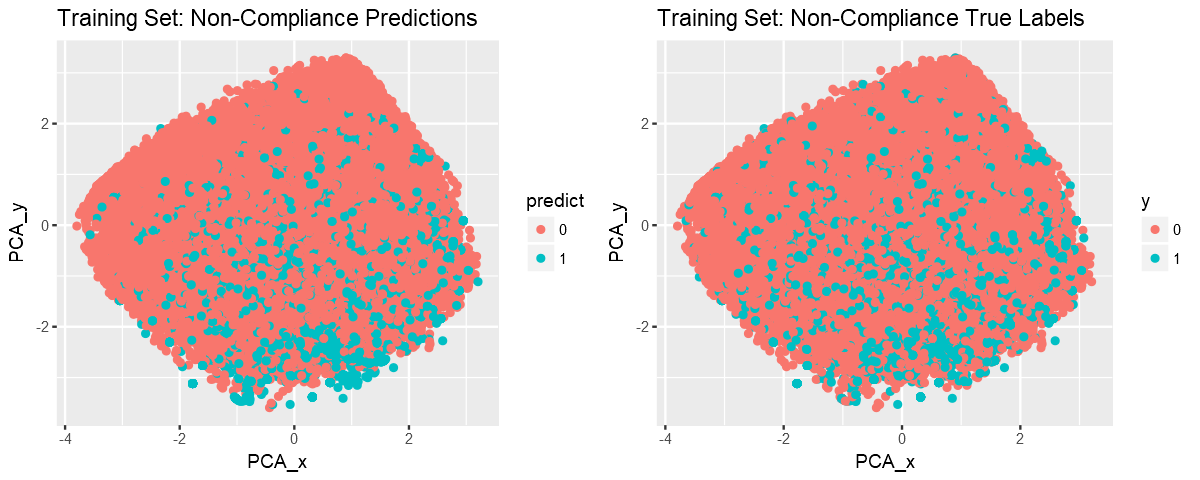

In [175]:
plot_test_predict <- ggplot(df_for_PCA_train,aes(x=PCA_x,y=PCA_y, col = predict)) +
geom_point() +
ggtitle('Training Set: Non-Compliance Predictions')

plot_test_y <- ggplot(df_for_PCA_train,aes(x=PCA_x,y=PCA_y, col = y)) +
geom_point() +
ggtitle('Training Set: Non-Compliance True Labels')

options(repr.plot.width=10, repr.plot.height=4)
grid.arrange(plot_test_predict,
             plot_test_y,
             ncol = 2
            )

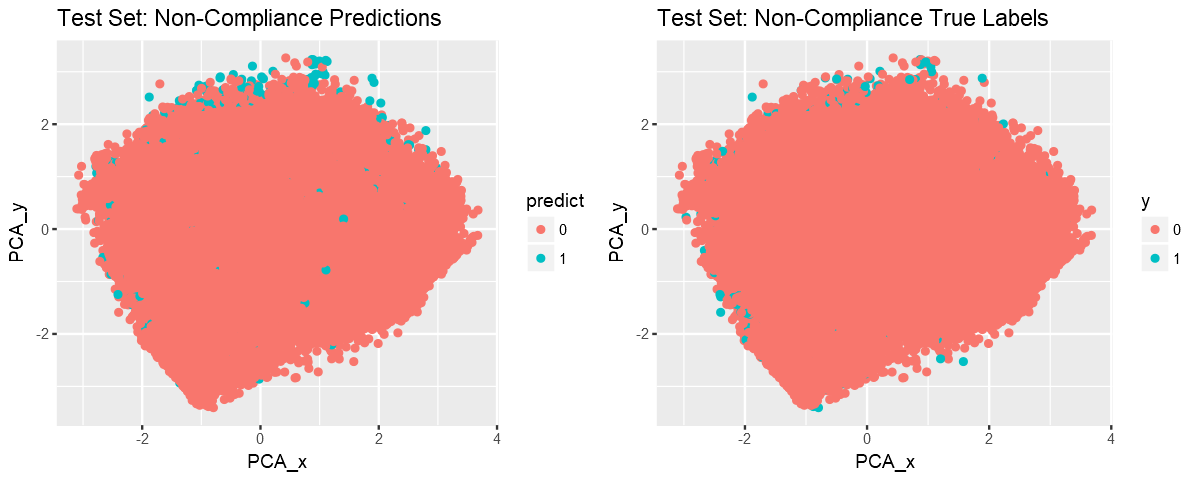

In [176]:
plot_test_predict <- ggplot(df_for_PCA_test,aes(x=PCA_x,y=PCA_y, col = predict)) +
geom_point() +
ggtitle('Test Set: Non-Compliance Predictions')

plot_test_y <- ggplot(df_for_PCA_test,aes(x=PCA_x,y=PCA_y, col = y)) +
geom_point() +
ggtitle('Test Set: Non-Compliance True Labels')

options(repr.plot.width=10, repr.plot.height=4)
grid.arrange(plot_test_predict,
             plot_test_y,
             ncol = 2
            )

__Observations__

The legend has

- Red for class 0 (compliant records) 

- Blue for class 1 (non-compliant records)

We want the distribution of red and blue dots to be the same on the left and right graphs (predict and actual values) for both the training set and the test set

Visually this appears to be what has happened, indicating our model was able to successfully classify many of the non-compliant records even though in the test set they only made up a small proportion of the data (~5%)

See below for a quantitative analysis of the results.

### 4.2 Confusion Matrix

In [178]:
# re-write class labels 0 and 1
df_test.results$y = ifelse(df_test.results$y==1,'Y=1', 'Y=0')
df_test.results$predict = ifelse(df_test.results$predict==1,'Pred=1', 'Pred=0')

In [179]:
head(df_test.results,3)

y,predict
Y=0,Pred=0
Y=0,Pred=0
Y=0,Pred=0


In [181]:
conf.matrix <- table(df_test.results$predict,df_test.results$y)
conf.matrix

        
           Y=0   Y=1
  Pred=0 66002  2481
  Pred=1  2320   497

In [182]:
TP <- conf.matrix['Pred=1','Y=1']
TN <- conf.matrix['Pred=0','Y=0']

FP <- conf.matrix['Pred=1','Y=0']
FN <- conf.matrix['Pred=0','Y=1']

In [183]:
accuracy <- (TP + TN) / (TP+TN+FP+FN)
round(accuracy*100,1)

[1] 93.3

In [184]:
precision <- (TP ) / (TP + FP)
round(precision*100,1)

[1] 17.6

In [185]:
recall <- (TP ) / (TP + FN)
round(recall*100,1)

[1] 16.7

### Write Model Metrics To File

In [186]:
split2.ratio.up = 0.3

In [187]:
df_NN_stats <- data.frame(
    NN.layers = 'c(60,20,10)',epochs=NN.epochs, accuracy= accuracy, precision = precision, recall=recall, split2.ratio.up=split2.ratio.up)

In [188]:
df_NN_stats

NN.layers,epochs,accuracy,precision,recall,split2.ratio.up
"c(60,20,10)",100,0.9326648,0.1764288,0.1668905,0.3


In [189]:
# first one only
#write.table(df_NN_stats, 'NN_models_stats.csv', sep = ",", row.names = FALSE)

In [191]:
# usually just append instead of rewriting the file
write.table(df_NN_stats, 'NN_models_stats.csv', col.names = FALSE, append = TRUE, sep = ',', row.names = FALSE)

In [ ]:
# how many h2o objects do we have?
dim(h2o.ls())

In [ ]:
# shutdown the h2o cluster
h2o.shutdown()